<a href="https://colab.research.google.com/github/AlejandroVillazonG/MAT468/blob/main/labs/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 2

### El objetivo del taller es utilizar el teorema de transformación y el algoritmo aceptación rechazo para simular una variable aleatoria $t$ multivariada.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Simulando solo $U[0,1]$, cree un código para simular una distribución de Laplace. Verifique experimentalmente que la distribución obtenida es una Laplace.

### **Hint:** Puede usar los códigos que hizo en el taller 1.

In [35]:
N = 10_000
U = np.random.uniform(0,1,N)
UU = np.random.uniform(0,1,N) # Para decidir el signo.

In [36]:
#inv_Laplace = lambda llambda, x, y : -np.log(1-x)/llambda if y>0.5 else np.log(1-x)/llambda

#llambda = 0.8
#U_laplace = np.array([inv_Laplace(llambda, x, y) for x,y in zip(U,UU)]) #más lento

In [37]:
inv_Laplace = np.vectorize(lambda llambda, x, y : -np.log(1-x)/llambda if y>0.5 else np.log(1-x)/llambda)

llambda = 0.8
U_laplace = inv_Laplace(llambda, U, UU)

In [38]:
f_laplace = lambda llambda, x : llambda / 2  * np.exp(-llambda*abs(x))

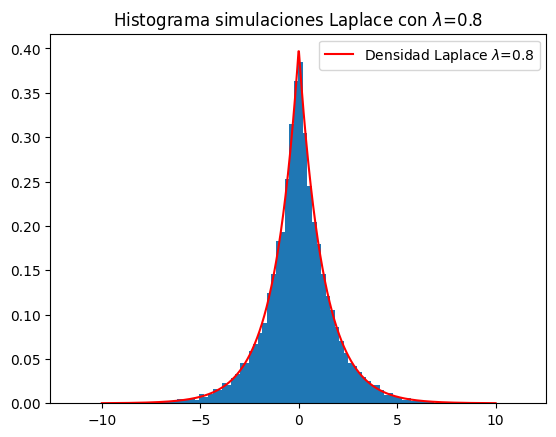

In [39]:
puntos = np.linspace(-10,10,1000)
plt.hist(U_laplace, bins = 100, density = True)
plt.plot(puntos,
         f_laplace(llambda, puntos),
         c = 'red',
         label = f'Densidad Laplace $\\lambda$={llambda}')
plt.title(f'Histograma simulaciones Laplace con $\\lambda$={llambda}')
plt.legend();

### 2. Con el método de aceptación rechazo, simule la variable aleatoria $Z\sim N(0,1)$ usando de distribución instrumental una distribución de Laplace (0,1). Verifique experimentalmente la distribución obtenida y compare el ratio de aceptación obtenido con el esperado.

In [40]:
f_normal_estandar = lambda x : np.exp(-x**2/2)/np.sqrt(2*np.pi)

In [41]:
M = 1.5 # Encontrado por simple inspección

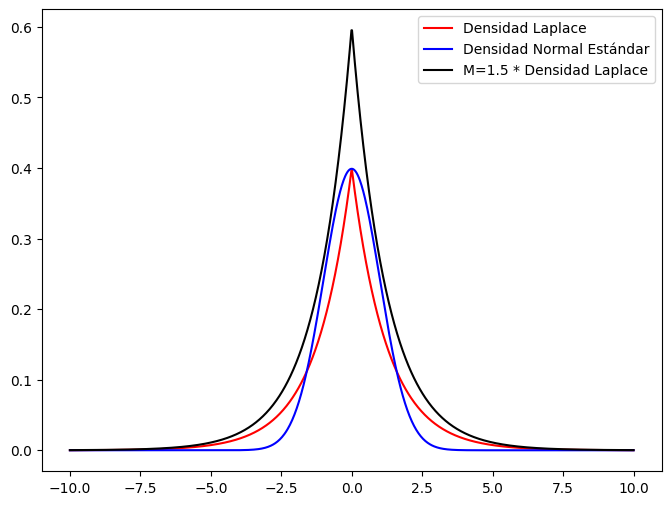

In [42]:
plt.figure(figsize=(8,6))
plt.plot(puntos,
         f_laplace(llambda, puntos),
         c = 'red',
         label = 'Densidad Laplace')
plt.plot(puntos,
         f_normal_estandar(puntos),
         c = 'blue',
         label = 'Densidad Normal Estándar')
plt.plot(puntos,
         M * f_laplace(llambda, puntos),
         c = 'black',
         label = f'{M=} * Densidad Laplace')
plt.legend();

In [43]:
f = f_normal_estandar
g = lambda x: f_laplace(llambda, x)

def metodo_acept_rechazo(N, M, f, g, r = False):
    '''
    Si r es True se devuelve la cantidad de rechazados dentro de loop.
    '''
    n = rechazados = 0
    l = []
    while n<N:
        u = np.random.uniform(0,1)
        y = inv_Laplace(llambda, np.random.uniform(0,1), np.random.uniform(0,1))
        if u <= f(y)/(M*g(y)):
            l.append(y)
            n += 1
        else:
            rechazados += 1
    return (np.array(l), rechazados) if r == True else np.array(l)

In [44]:
def acept_rechazo_modificado(N, M, f, g, r = False):
    '''
    Si r es True se devuelve los puntos rechazados dentro del loop.
    '''
    n = 0
    aceptados = []
    rechazados = []
    while n<N:
        u = np.random.uniform(0,1)
        y = inv_Laplace(llambda, np.random.uniform(0,1), np.random.uniform(0,1))
        if u <= f(y)/(M*g(y)):
            aceptados.append([y, u*M*g(y)])
            n += 1
        else:
            rechazados.append([y, u*M*g(y)])
    return (np.array(aceptados), np.array(rechazados)) if r == True else np.array(aceptados)[:,0]

In [45]:
U_normal, rechazados = acept_rechazo_modificado(N, M, f, g, True)

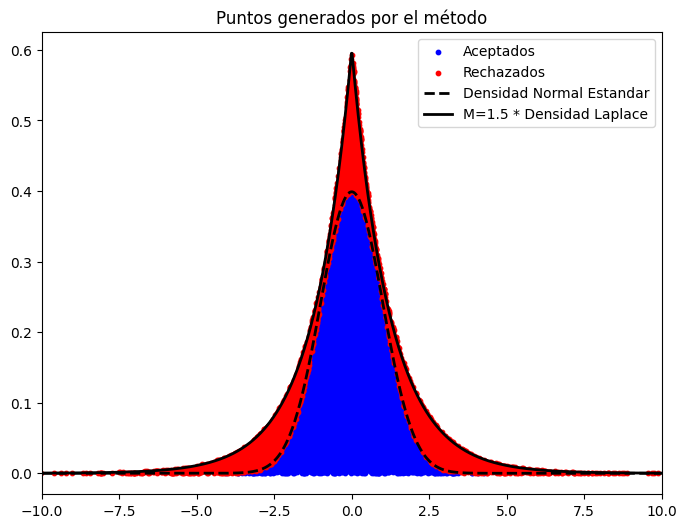

In [46]:
plt.figure(figsize = (8,6))

# PUNTOS
plt.scatter(U_normal[:,0], U_normal[:,1],
            c = 'blue',
            label = 'Aceptados',
            s = 10)
plt.scatter(rechazados[:,0], rechazados[:,1],
            c = 'red',
            s = 10,
            label = 'Rechazados')
# Lineas
plt.plot(puntos,
         f_normal_estandar(puntos),
         c = 'black',
         linestyle = '--',
         linewidth = 2,
         label = 'Densidad Normal Estandar')
plt.plot(puntos,
         M * f_laplace(llambda, puntos),
         c = 'black',
         linewidth = 2,
         label = f'{M=} * Densidad Laplace')
plt.xlim(-10,10)
plt.title(f'Puntos generados por el método')
plt.legend();

In [47]:
U_normal, nro_rechazados = metodo_acept_rechazo(N, M, f, g, True)

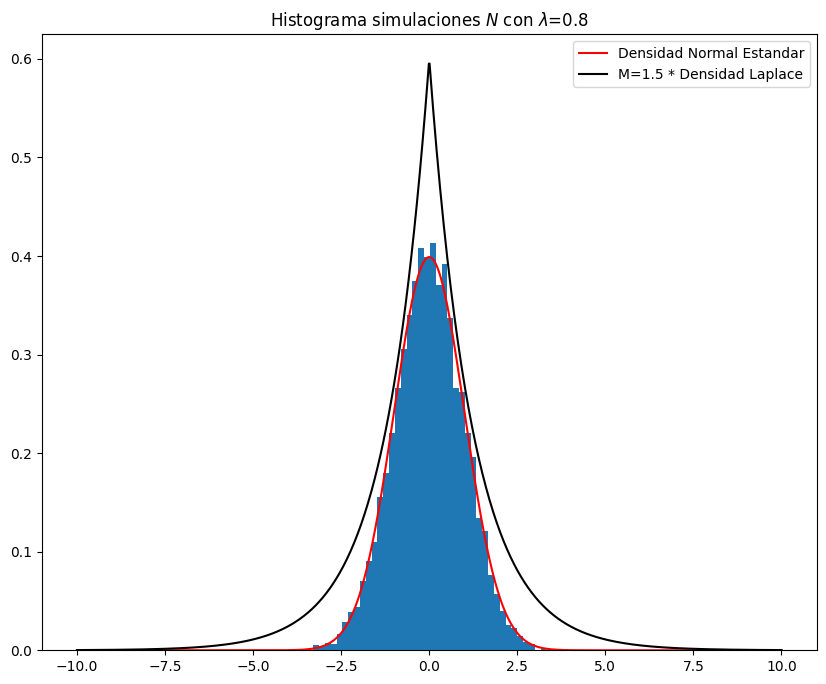

In [48]:
plt.figure(figsize = (10,8))
plt.hist(U_normal, bins = 50, density = True)
plt.plot(puntos,
         f_normal_estandar(puntos),
         c = 'red',
         label = 'Densidad Normal Estandar')
plt.plot(puntos,
         M * f_laplace(llambda, puntos),
         c = 'black',
         label = f'{M=} * Densidad Laplace')

plt.title(f'Histograma simulaciones $N$ con $\\lambda$={llambda}')
plt.legend();

In [49]:
# ratio aceptación
1 - nro_rechazados/(N+nro_rechazados)

0.6604583581005218

In [50]:
1/M

0.6666666666666666

### 3. Para $n = 1000$ y $\nu=5$ genere una muestra de $4n+n\nu$ normales $(0,1)$.

In [51]:
n = 100_000
nu = 5
normales, nro_rechazados = metodo_acept_rechazo(4*n+n*nu, M, f, g, True)

In [52]:
# Tasa de aceptación
1 - nro_rechazados / ( nro_rechazados + 4*n+n*nu )

0.666575321159693

### 4. Usando la muestra obtenida anteriormente, obtenga $n=1000$ observaciones de las siguientes variables aleatorias:

 * ### $R\sim \|Z\|$, con $Z\sim N_2(0,I)$
 * ### $U\sim U(\mathbb{S}^d)$

Dada la independencia en coordenadas, usaremos las primeras 2.000 simulaciones para obtener $Z$ y posteriormente calcularle la norma obteniendo $R$.

In [53]:
Zs = np.column_stack((normales[:n],normales[n:2*n]))
Rs = np.linalg.norm(Zs, axis = 1, keepdims = True)

Note que $\frac{Z}{\|Z\|}\sim U(\mathbb{S}^d)$, por lo que usaremos las siguientes 2.000 simulaciones para obtener $U$.

In [54]:
Zs = np.column_stack((normales[2*n:3*n],normales[3*n:4*n]))
Us = Zs / np.linalg.norm(Zs, axis = 1, keepdims = True)

Us.shape

(100000, 2)

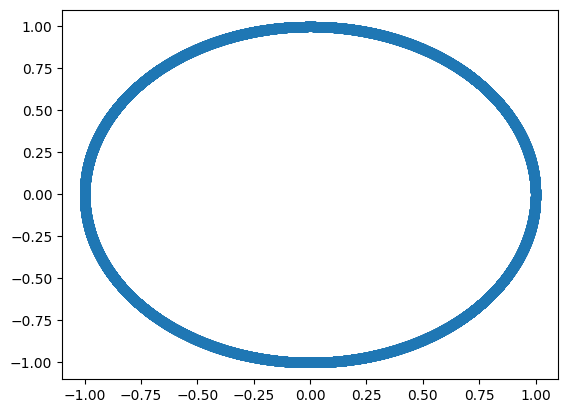

In [55]:
plt.scatter(Us[:,0], Us[:,1]);

### 5. Simule una variable aleatoria normal multivariada $N_2(0,\Sigma)$ con $\Sigma = \begin{pmatrix}1 & 0.5 \\ 0.5 & 1 \end{pmatrix}$ usando su representación estocastica $RU~A$ con $A$ la descomposición de Cholesky de $\Sigma$ y, $R,U$ las variables aleatorias del item anterior

In [56]:
Sigma = np.array([[1, 0.5],
                  [0.5, 1]])
A = np.linalg.cholesky(Sigma).T

In [57]:
A.T @ A

array([[1. , 0.5],
       [0.5, 1. ]])

In [58]:
normales_bivariadas = (Rs * Us) @ A

normales_bivariadas.shape

(100000, 2)

### 6. Usando $n=1000$ observaciones, grafique la densidad experimental de la normal bivariada obtenida y comparela con su densidad teórica.

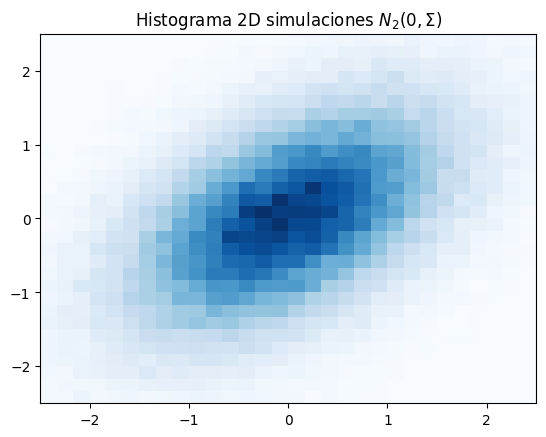

In [59]:
plt.hist2d(normales_bivariadas[:, 0], normales_bivariadas[:, 1],
           bins = 30, cmap='Blues', density = True,
           range=[[-2.5, 2.5], [-2.5, 2.5]])
plt.title(r'Histograma 2D simulaciones $N_2(0,\Sigma)$');

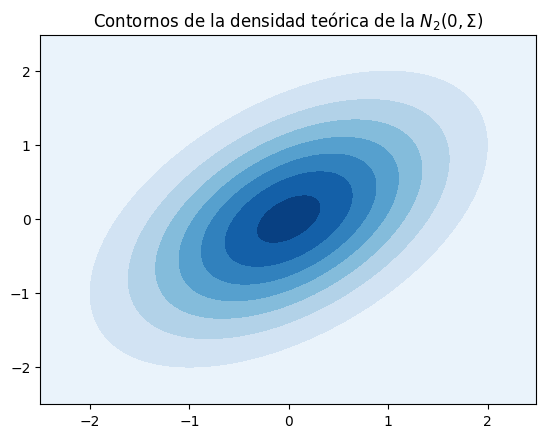

In [60]:
from scipy.stats import multivariate_normal

rv = multivariate_normal(np.zeros(2), Sigma)

x, y = np.mgrid[-2.5:2.5:.01, -2.5:2.5:.01]
pos = np.dstack((x, y))

rv = multivariate_normal([0, 0], Sigma)

plt.contourf(x, y, rv.pdf(pos), cmap = 'Blues')
plt.title(r'Contornos de la densidad teórica de la $N_2(0,\Sigma)$');

### 7. Usando las muestras obtenidas en el punto anterior, simule una variable aleatoria $T\sim t_5(0, \Sigma)$ a través de la representación estocástica:

### $$T = \sqrt{\frac{\nu}{X_\nu^2}X_1^2}UA$$

### con $U\sim U(\mathbb{S}^d)$, $X^2 \sim \chi_\nu^2$ y $A$ la descomposición de Cholesky de la matriz $\Sigma$.

Recordemos que si $Z_i\sim N(0,1)$, entonces $\sum_{i=1}^{\nu} Z_i^2 \sim \chi_\nu^2$.

In [61]:
chis_5 = (normales[4*n:].reshape((n,5))**2).sum(axis=1, keepdims = True)
chis_1 = (metodo_acept_rechazo(n, M, f, g)**2).reshape((n,1))

In [62]:
from scipy.special import gamma

f_chi = lambda nu, x : (1/2)**(nu/2) * x**(nu/2 - 1) * np.exp(-x/2) / gamma(nu/2)

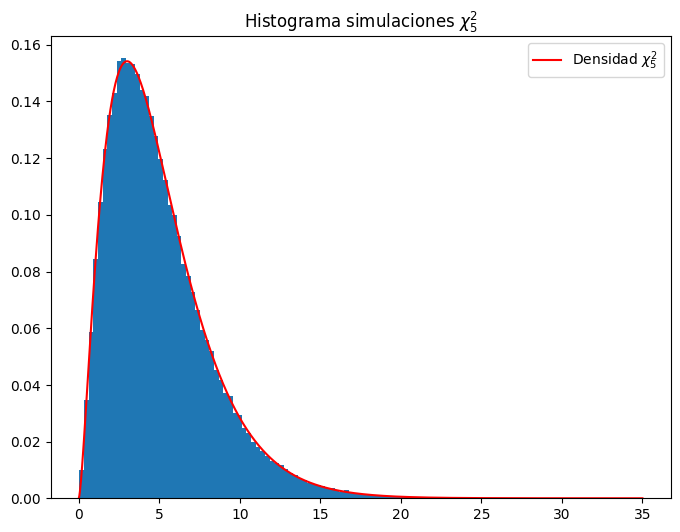

In [63]:
puntos = np.linspace(0,35,1000)

plt.figure(figsize = (8,6))
plt.hist(chis_5, bins = 100, density = True)
plt.plot(puntos,
         f_chi(5, puntos),
         c = 'red',
         label = r'Densidad $\chi_5^2$')
plt.title(r'Histograma simulaciones $\chi_5^2$')
plt.legend();

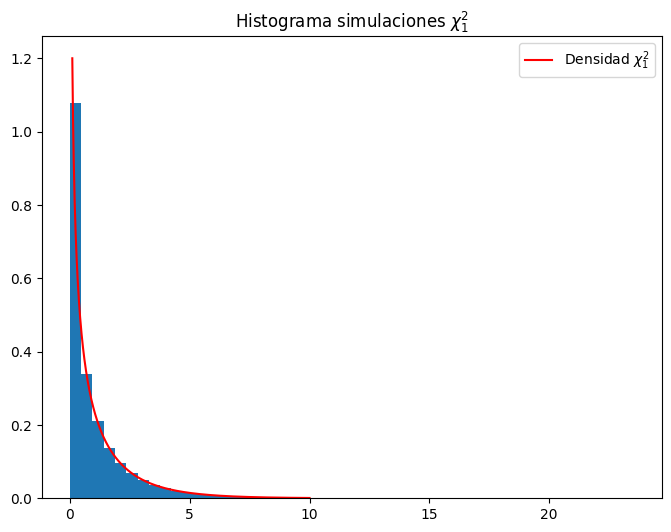

In [64]:
puntos = np.linspace(0.1,10,1000)

plt.figure(figsize = (8,6))
plt.hist(chis_1, bins = 50, density = True)
plt.plot(puntos,
         f_chi(1, puntos),
         c = 'red',
         label = r'Densidad $\chi_1^2$')
plt.title(r'Histograma simulaciones $\chi_1^2$')
plt.legend();

In [65]:
Ts = np.sqrt(nu * chis_1 / chis_5) * Us @ A

### 8. Usando $n=1000$ observaciones, grafique la densidad experimental de $T$ y compárela con su densidad teórica.

### **Hint:** La función de densidad de una distribución $t_\nu(\mu, \Sigma)$ es: $$f(x) = \frac{\Gamma[(\nu+p)/2]}{\Gamma(\nu/2)(\nu\pi)^{p/2} |\Sigma|^{1/2}}\left[1+\frac{1}{\nu}(x-\mu)^\top\Sigma^{-1}(x-\mu)\right]^{-(\nu+p)/2}$$

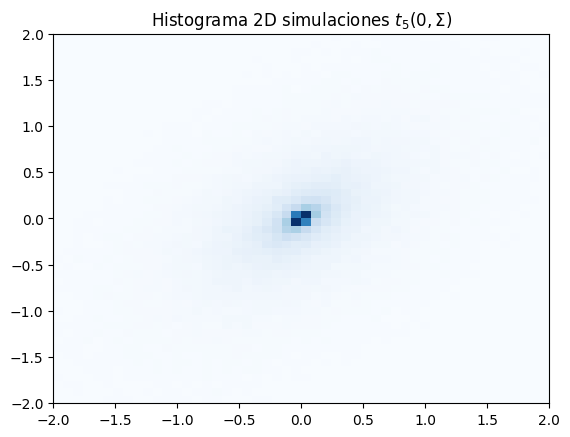

In [70]:
plt.hist2d(Ts[:, 0], Ts[:, 1],
           bins = 50,
           cmap='Blues',
           density = True,
           range=[[-2, 2], [-2, 2]])
plt.title(r'Histograma 2D simulaciones $t_5(0,\Sigma)$');

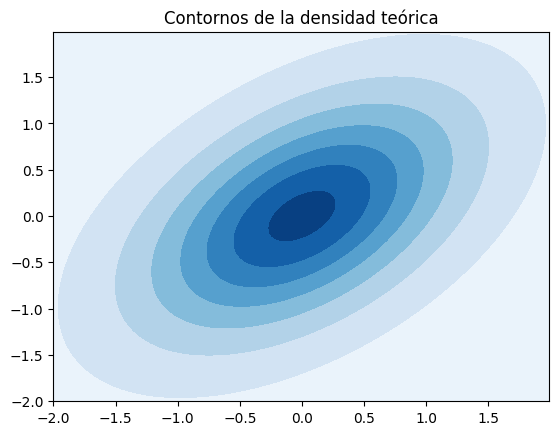

In [67]:
from scipy.stats import multivariate_t

t = multivariate_t(np.zeros(2), Sigma, df = 5)

x, y = np.mgrid[-2:2:.01, -2:2:.01]
pos = np.dstack((x, y))

plt.contourf(x, y, t.pdf(pos), cmap = 'Blues')
plt.title('Contornos de la densidad teórica');

### 9. Repita los puntos del 3. al 7. pero haciendo variar el número de observaciones $n$.